In [40]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [41]:
trainset='../input/food-dataset2/Train'

In [42]:
data_generator = ImageDataGenerator(rescale=1./255,validation_split=0.1,width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [43]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 4323 images belonging to 10 classes.
Found 476 images belonging to 10 classes.


In [44]:
validation_set.class_indices

{'Banh beo': 0,
 'Banh mi': 1,
 'Bun bo Hue': 2,
 'Bun dau mam tom': 3,
 'Bun rieu': 4,
 'Chao long': 5,
 'Com tam': 6,
 'Goi cuon': 7,
 'Hu tieu': 8,
 'Pho': 9}

In [45]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(100,100,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [46]:

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [47]:
model.fit(train_dataset,batch_size=128,epochs=40,verbose=1,validation_data=validation_set)

Epoch 1/40
34/34 [==============================] - 180s 5s/step - loss: 2.8882 - accuracy: 0.1221 - val_loss: 2.2963 - val_accuracy: 0.1134
Epoch 2/40
34/34 [==============================] - 179s 5s/step - loss: 2.2857 - accuracy: 0.1247 - val_loss: 2.2184 - val_accuracy: 0.1534
Epoch 3/40
34/34 [==============================] - 177s 5s/step - loss: 2.2248 - accuracy: 0.1506 - val_loss: 2.1357 - val_accuracy: 0.2080
Epoch 4/40
34/34 [==============================] - 185s 5s/step - loss: 2.1882 - accuracy: 0.1742 - val_loss: 2.1722 - val_accuracy: 0.1765
Epoch 5/40
34/34 [==============================] - 180s 5s/step - loss: 2.1726 - accuracy: 0.1915 - val_loss: 2.1252 - val_accuracy: 0.2416
Epoch 6/40
34/34 [==============================] - 180s 5s/step - loss: 2.1419 - accuracy: 0.2080 - val_loss: 2.0551 - val_accuracy: 0.2500
Epoch 7/40
34/34 [==============================] - 180s 5s/step - loss: 2.0804 - accuracy: 0.2452 - val_loss: 1.8781 - val_accuracy: 0.3277
Epoch 8/40
34

In [48]:
score=model.evaluate(validation_set,verbose=1)
print("test accuracy = ",score[1])

4/4 [==============================] - 12s 3s/step - loss: 1.0722 - accuracy: 0.6534
test accuracy =  0.6533613204956055


In [50]:
model.save('./food_final.h5')

In [ ]:
model_food=load_model('../input/food-cnn/food_final.h5')

In [52]:
classes = ['Bánh Bèo','Bánh Mì','Bún Bò Huế','BĐMT','Bún Riêu','Cháo lòng','Cơm tấm','Gỏi cuốn','Hủ tiếu','Pho']


Bánh Mì


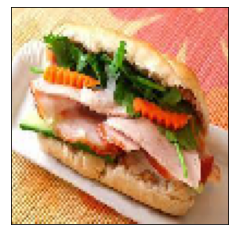

In [53]:
url='../input/anhmang/banh mi.jfif'
img=load_img(url,target_size=(100,100))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,100,100,3)
img=img/255.0
print(classes[np.argmax(model.predict(img))])

Bún Bò Huế


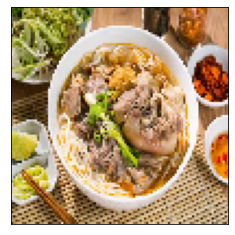

In [54]:
url='../input/anhmang/bunbo.jpg'
img=load_img(url,target_size=(100,100))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,100,100,3)
img=img/255.0
print(classes[np.argmax(model.predict(img))])

Gỏi cuốn


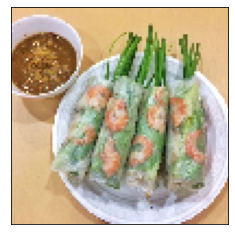

In [55]:
url='../input/anhmang/goicuon.jpg'
img=load_img(url,target_size=(100,100))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,100,100,3)
img=img/255.0
print(classes[np.argmax(model.predict(img))])

In [66]:
test_url= '../input/test-food/test'
test=ImageDataGenerator(rescale=1./255,width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [67]:
test_data=test.flow_from_directory(
    test_url,
    target_size=(100,100),
    batch_size=128,
    class_mode='categorical',
    shuffle=False, 
   )

Found 30 images belonging to 1 classes.


/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


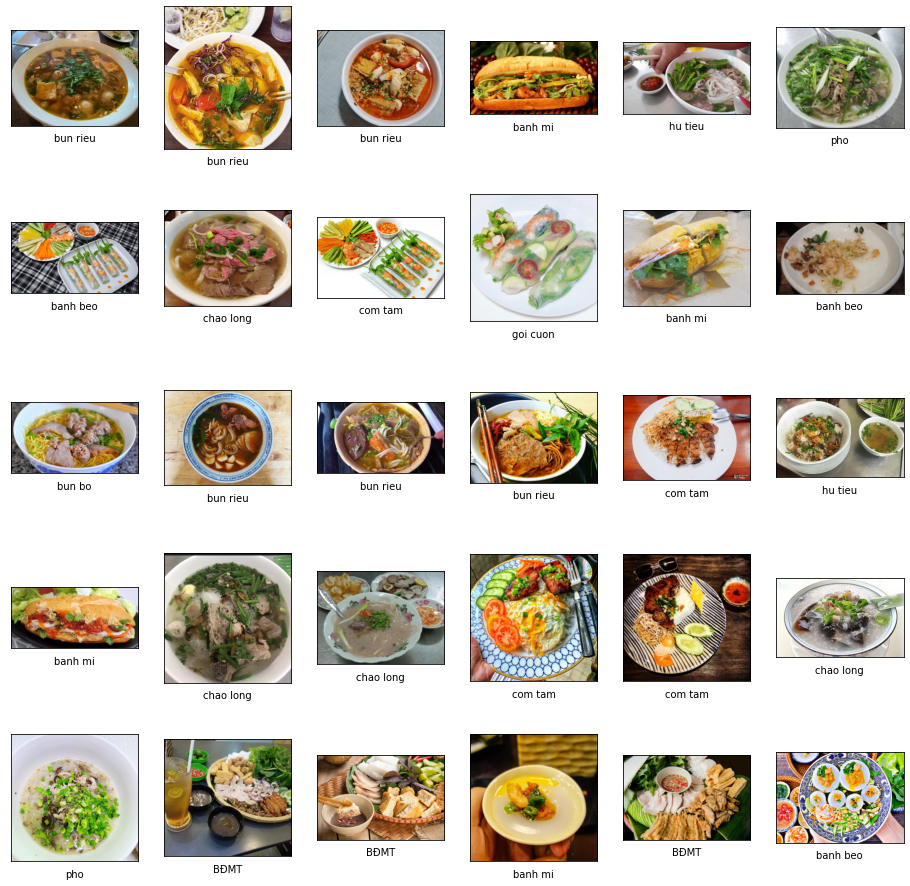

In [68]:
results={ 0:'banh beo',1:'banh mi',2:'bun bo',3:'BĐMT',4:'bun rieu',5:'chao long',6:'com tam',7:'goi cuon',8:'hu tieu',9:'pho'}
pred = model.predict_generator(test_data)
plt.figure(figsize=(16,16))
for i in range(pred.shape[0]):
  plt.subplot(5,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(load_img(test_data.filepaths[i]))
  plt.xlabel(results[np.argmax(pred[i])])
plt.show()